# Android WeatherApp Project Guide for absolute beginners - 2. WeatherRVModal.java

I created this guide as a reference for my personal learning on Android app development. The original tutorial available in link in the references below.


**References**  
- GeeksforGeeks (2021) Making Weather App in Android Studio | Android Projects | GeeksforGeeks https://www.youtube.com/watch?v=q7NF-2gtfEU&t=864s

## Get Weather API.

- Sign up at: https://www.weatherapi.com/
- Copy the API key at: https://www.weatherapi.com/my/
- Go to [API Explorer] tab.
  - Click [Forecast]
  - Paste your API key.
  - Format is `json`.
  - Click [Show Response]

## Get a workspace at POSTMAN API platform.
- Sign up at: https://web.postman.co/
- Click [Workspaces] tab.
  - Click `+`, open a new request tab.
  - Copy your `call` from the `weatherapi.com`.

### Interacting with API
we can get loads of data from API services. In this case, we get weather data in the form of `json object` from a weather data API service, and use a few selected `paramters` from the `object` to furnish our WeatherApp.

In [ ]:
from google.colab import drive
drive.mount('here')

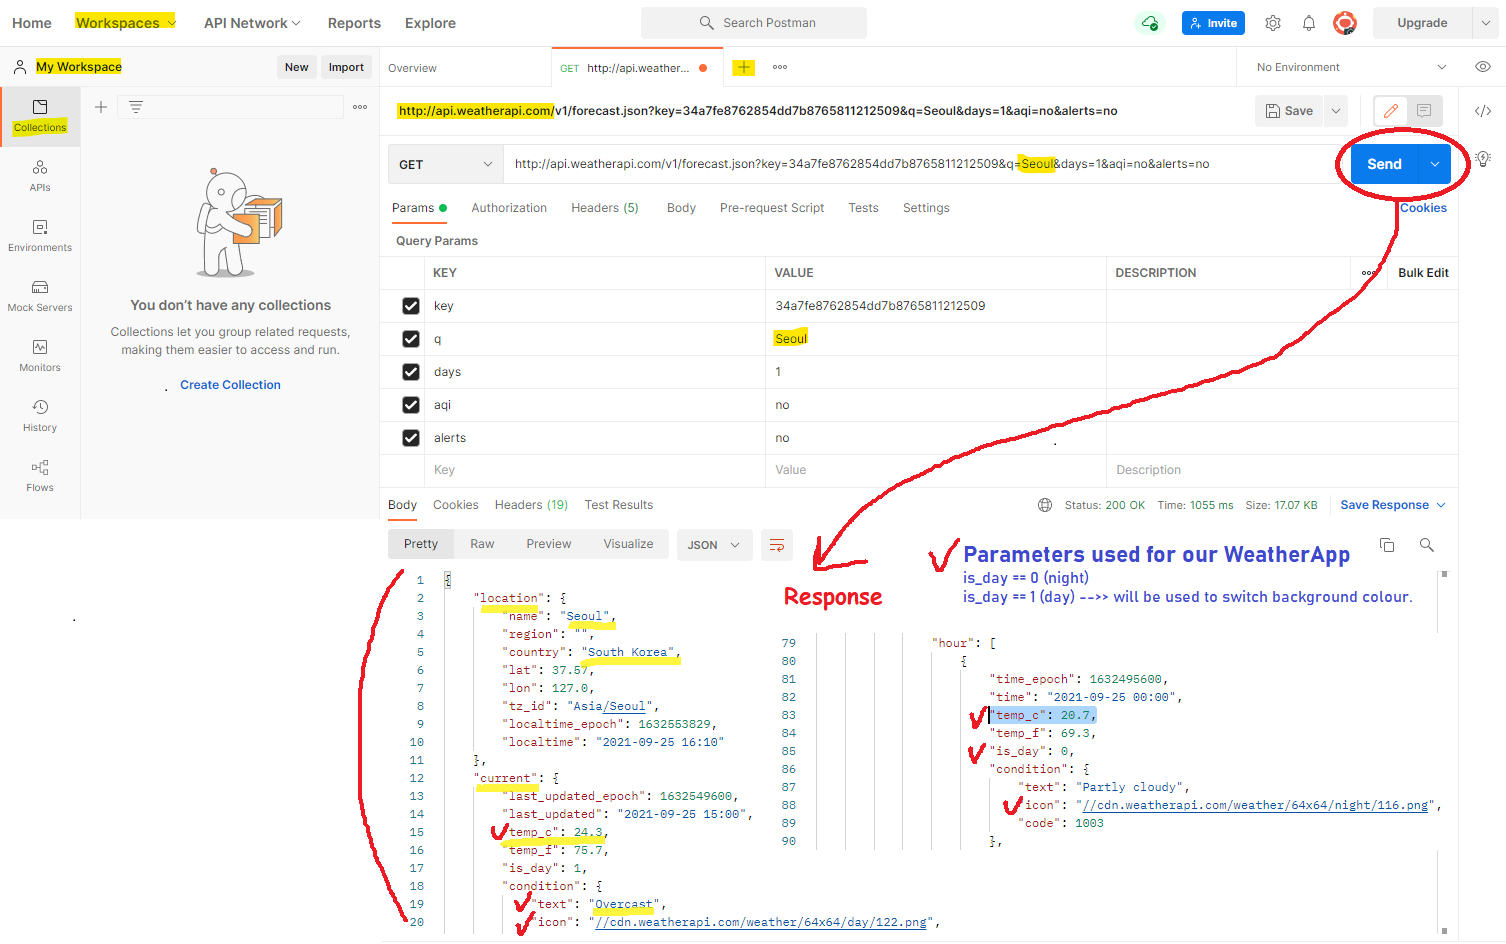

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow

def show_img(path):
    img = cv2.imread(path)
    cv2_imshow(img)

path = "/content/here/MyDrive/Android/Postman.png"
show_img(path)

# MainActivity.java





### 1) Declare variables


### 2) Initialise the variables
inside the **`protected void onCreate(Bundle savedInstanceState){}`** method

In [ ]:
# MainActivity.java

public class MainActivity extends AppCompatActivity {

    // Declare variables with there id's.
    private RelativeLayout homeRL;
    private ProgressBar loadingPB;
    private TextView cityNameTV, temperatureTV, conditionTV;
    private RecyclerView weatherRV;
    private TextInputEditText cityEdt;
    private ImageView backIV, iconIV, searchIV;


    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_main);

        // initialise the variables here.
        homeRL = findViewById(R.id.idRLHome);
        loadingPB = findViewById(R.id.idPBLoading);
        cityNameTV = findViewById(R.id.idTVCityName);
        temperatureTV = findViewById(R.id.idTVTemperature);
        conditionTV = findViewById(R.id.idTVCondition);
        weatherRV = findViewById(R.id.idRVWeather);
        cityEdt = findViewById(R.id.idEditCity);
        backIV = findViewById(R.id.idIVBack);
        iconIV = findViewById(R.id.idIVIcon);
        searchIV = findViewById(R.id.idIVSearch);

        // API we will going to use.
    }
}

# `WeatherRVModal.java` - Create a class 

- path: `java > com.example.weatherapp > WeatherRVModal.java`

## 1) Declare `variables` for the API parameters

## 2) Create a `constructor`

## 3) Create `Getters` and `Setters`

In [ ]:
# WeatherRVModal.java

# Class for our RecyclerView
public class WeatherRVModal {

    # Create variables for different fields.
    # These are the parameters from the API response.
    # We checked this on the POSTMAN platform (compare with the image above).
    private String time;
    private String temperature;
    private String icon;  // the image URL will be stored in this variable.
    private String windSpeed;

    # 2) Constructur
    public WeatherRVModal(String time, String temperature, String icon, String windSpeed) {
        this.time = time;
        this.temperature = temperature;
        this.icon = icon;
        this.windSpeed = windSpeed;
    }

    # 3) Getters and Setters
    public String getTime() {
        return time;
    }

    public void setTime(String time) {
        this.time = time;
    }

    public String getTemperature() {
        return temperature;
    }

    public void setTemperature(String temperature) {
        this.temperature = temperature;
    }

    public String getIcon() {
        return icon;
    }

    public void setIcon(String icon) {
        this.icon = icon;
    }

    public String getWindSpeed() {
        return windSpeed;
    }

    public void setWindSpeed(String windSpeed) {
        this.windSpeed = windSpeed;
    }
}

## 4) Create a `layout resource file`

- path: `res > layout > weather_rv_item.xml`

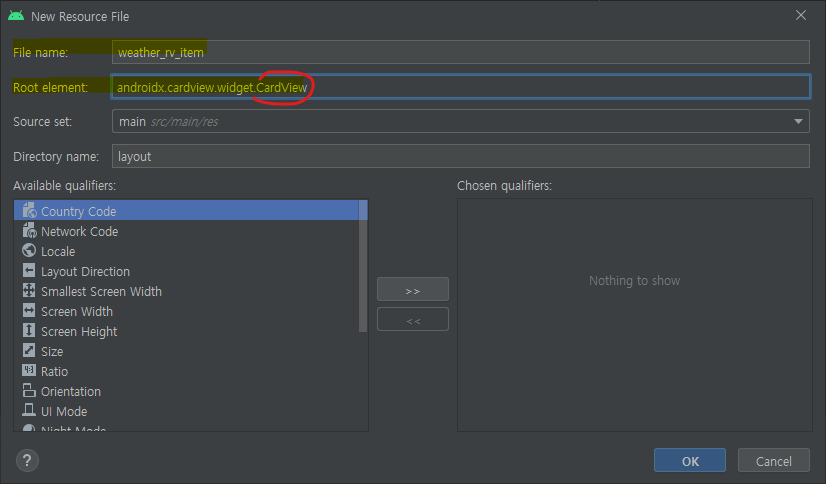

In [ ]:
path = "/content/here/MyDrive/Android/layout_resource_cardview.png"
show_img(path)

### weather_rv_item.xml

#### Edit `CardView` settings:
  - `layout_width`
  - `layout_height`
  - `layout_gravity`
  - `margin`
  - `background`
  - `cardElevation`
  - `cardCornerRadius`

In [ ]:
# weather_rv_item.xml
# Parent CardView layout

<?xml version="1.0" encoding="utf-8"?>
<androidx.cardview.widget.CardView xmlns:android="http://schemas.android.com/apk/res/android"
    android:layout_width="100dp"
    android:layout_height="wrap_content"
    xmlns:app="http://schemas.android.com/apk/res-auto"
    android:layout_gravity="center"
    android:layout_margin="4dp"
    app:cardElevation="6dp"
    app:cardCornerRadius="10dp"
    android:background="@android:color/transparent"
    >
    
</androidx.cardview.widget.CardView>

#### Add a `RelativeLayout`
- Create a custom `background`
  - Click on `res > drawable` - [New] - [Drawable Resource File]
    - Filename: `card_back`
    - Root element: `shape`

In [ ]:
<?xml version="1.0" encoding="utf-8"?>
<androidx.cardview.widget.CardView xmlns:android="http://schemas.android.com/apk/res/android"

...

    <RelativeLayout
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:background=""   # <---- here you will need a Drawable Resource File. So create one.
                                # The file name for this background is card_back.xml inside res > drawable
        
</androidx.cardview.widget.CardView>

#### Create `card_back.xml`
- Specify:
  - `shape`
  - `corners` and `radius`
  - `color`

In [ ]:
# card_back.xml

<?xml version="1.0" encoding="utf-8"?>
<shape android:shape="rectangle" xmlns:android="http://schemas.android.com/apk/res/android">
<corners android:radius="10dp"/>
    <solid android:color="#FF292D36"/>

</shape>        # We will use these settings inside 'weather_rv_item.xml'

### weather_rv_item.xml

In [ ]:
<?xml version="1.0" encoding="utf-8"?>
<androidx.cardview.widget.CardView xmlns:android="http://schemas.android.com/apk/res/android"
    android:layout_width="100dp"
    android:layout_height="wrap_content"
    xmlns:app="http://schemas.android.com/apk/res-auto"
    android:layout_gravity="center"
    android:layout_margin="4dp"
    app:cardElevation="6dp"
    app:cardCornerRadius="10dp"
    android:background="@android:color/transparent"
    >
    
    <RelativeLayout
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:background="@drawable/card_back"
        >

        <TextView                                   # text for time
            android:layout_width="match_parent"
            android:layout_height="wrap_content"
            android:id="@+id/idTVTime"
            android:gravity="center"
            android:padding="4dp"
            android:text="time"
            android:textColor="@color/white"
            android:textAlignment="center"
            />

        <TextView                                   # text for temperature
            android:layout_width="match_parent"
            android:layout_height="wrap_content"


        <ImageView                                  # Display weather condition
            android:layout_width="40dp"
            android:layout_height="40dp"
            android:layout_below="@id/idTVTemperature"
            android:id="@+id/idIVCondition"
            android:layout_centerHorizontal="true"
            android:layout_margin="5dp"
            android:padding="4dp"
            android:src="@mipmap/ic_launcher"
            />

        <TextView                                   # text for windspeed  
            android:layout_width="match_parent"
            android:layout_height="wrap_content"
            android:id="@+id/idTVWindspeed"
            android:textAlignment="center"
            android:gravity="center"
            android:layout_centerHorizontal="true"
            android:layout_below="@id/idIVCondition"
            android:textColor="@color/white"
            android:padding="3dp"
            android:layout_margin="4dp"
            />

    </RelativeLayout>

</androidx.cardview.widget.CardView>

# `Adaptor class` - Create a class

- path: `java > com.example.weatherapp > WeatherRVAdapter.java`

## 1) Extend `RecyclerView.Adapter<WeatherRVAdapter.ViewHolder>`

In [ ]:
package com.example.weatherapp;

...

import androidx.recyclerview.widget.RecyclerView;

# Extend this class to the RecyclerView.
public class WeatherRVAdapter extends RecyclerView.Adapter<WeatherRVAdapter.ViewHolder> {

## 2) Implement methods

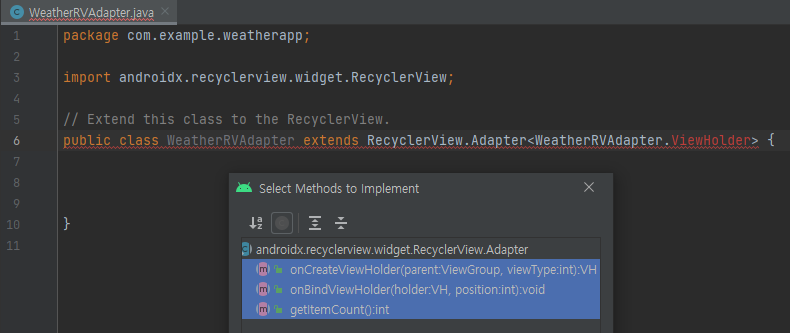

In [ ]:
path = "/content/here/MyDrive/Android/WeatherRVAdapter_implement_methods.png"
show_img(path)

## 3-1) `inner class` for `ViewHolder`


"*In object-oriented programming (OOP), an inner class or nested class is a class declared entirely within the body of another class or interface. It is distinguished from a subclass.* (from [Wikipedia](https://en.wikipedia.org/wiki/Inner_class))"

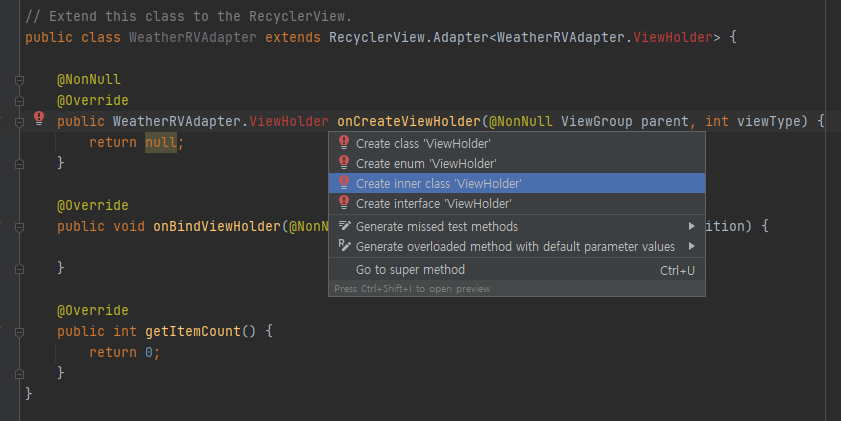

In [ ]:
path = "/content/here/MyDrive/Android/WeatherRVAdapter_ViewHolder_create_inner_class.png"
show_img(path)

## 3-2) `ViewHolder`
- Declare variables (3 TextViews and 1 ImageView)
- Initialise them.


### `ItemView`?
- An `ItemView` in Android can be described as a single row item in a list.
- An `ItemView` can be described as single row for listview or Recycler view in android.

In [ ]:
# WeatherRVAdapter.java

# Extend this class to the RecyclerView.
public class WeatherRVAdapter extends RecyclerView.Adapter<WeatherRVAdapter.ViewHolder> {

    ...

    # Create an inner class ViewHolder here.
    # Make this inner class public because we have  to create a constructor.
    public class ViewHolder extends RecyclerView.ViewHolder{

        # Create 3 TextView and 1 ImageView variables here.
        private TextView windTV, temperaturTV, timeTV;
        private ImageView conditionTV;

        public ViewHolder(@NonNull View itemView) {
            super(itemView);

            # Initialise them here.
            windTV = itemView.findViewById(R.id.idTVWindspeed);
            temperaturTV = itemView.findViewById(R.id.idTVTemperature);
            timeTV = itemView.findViewById(R.id.idTVTime);
            conditionTV = itemView.findViewById(R.id.idTVCondition);
        }
    }
}
    ...

}

## 3-3) `Context` & `ArrayList<WeatherRVModal>`

- 1) Declare variables
  - `Context context`
  - `ArrayList<WeatherRVModal>`
- 2) Create a `constructor`


### **`Context` in Android?**  


"Interface to global information about an application environment. This is an abstrac.t class whose implementation is provided by the Android system. It allows access to application-specific resources and classes, as well as up-calls for application-level operations such as launching activities, broadcasting and receiving intents, etc. ([Android Documentation](https://developer.android.com/reference/android/content/Context))"

In [ ]:
# WeatherRVAdapter.java

# Extend this class to the RecyclerView.
public class WeatherRVAdapter extends RecyclerView.Adapter<WeatherRVAdapter.ViewHolder> {

    ...

    # Declare variables
    private Context context;
    private ArrayList<WeatherRVModal> weatherRVModalArrayList;

    # Create a Constructor
    public WeatherRVAdapter(Context context, ArrayList<WeatherRVModal> weatherRVModalArrayList) {
        this.context = context;
        this.weatherRVModalArrayList = weatherRVModalArrayList;
    }

    ...

}

## 3-4) `onBindViewHolder`



In [ ]:
# WeatherRVAdapter.java

# Extend this class to the RecyclerView.
public class WeatherRVAdapter extends RecyclerView.Adapter<WeatherRVAdapter.ViewHolder> {

    ...

    @Override
    public void onBindViewHolder(@NonNull WeatherRVAdapter.ViewHolder holder, int position) {

        # Add our data (TextView and ImageView) here.
        WeatherRVModal modal = weatherRVModalArrayList.get(position);
        holder.temperaturTV.setText(modal.getTemperature()+"°c");
        Picasso.get().load("http:".concat(modal.getIcon())).into(holder.conditionTV);
        holder.windTV.setText(modal.getWindSpeed()+"Km/h");
        SimpleDateFormat input = new SimpleDateFormat("yyyy-MM-dd hh:mm"); # Specify the format in reference to the response.
        SimpleDateFormat output = new SimpleDateFormat("hh:mm aa");

        try{    
            Date t = input.parse(modal.getTime());                         # change the date format here.
            holder.timeTV.setText(output.format(t));
        } catch (ParseException e){
            e.printStackTrace();
        }

    }

    ...

}

# Wiring btw `WeatherRVAdapter.java` & `weather_rv_item.xml`

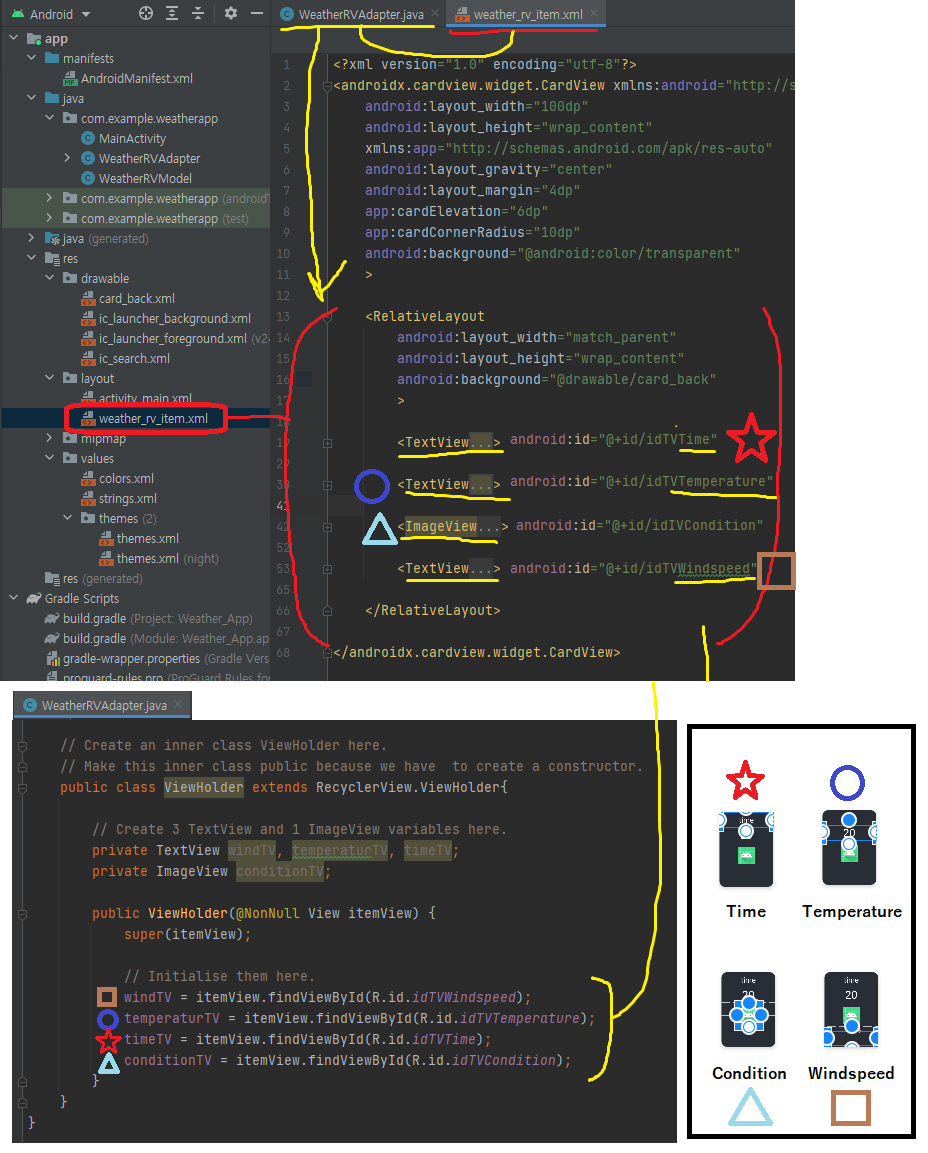

In [ ]:
connectivity = cv2.imread("/content/here/MyDrive/Android/xml and java connectivity.png")
cv2_imshow(connectivity)

# Error Notes
1) Missing a variable:

    return new ViewHolder();
    
    ViewHolder cannot be applied to 0.

- Solution:  `return new ViewHolder(view);`
